# 4. 数据计算与统计试题

4.1计算股票600104与600518的相关系数、spearman排序相关性与30天滚动的五日收益协方差

In [2]:
import pandas as pd
stock1 = pd.read_excel('sz50.xlsx',sheetname='600104.XSHG', index_col='datetime')
stock2 = pd.read_excel('sz50.xlsx',sheetname='600518.XSHG', index_col='datetime')
five_day_df = pd.concat([stock1.close.pct_change(5),stock2.close.pct_change(5)],keys=['stock1','stock2'],axis=1)

In [3]:
# 相关系数
correlation = five_day_df.corr()
print(correlation)

          stock1    stock2
stock1  1.000000  0.348809
stock2  0.348809  1.000000


In [4]:
# spearman排序相关性
spearman = five_day_df.corr(method='spearman')
print(spearman)

         stock1   stock2
stock1  1.00000  0.38035
stock2  0.38035  1.00000


In [5]:
# 30天滚动的五日收益协方差
cov_30 = five_day_df.rolling(30).cov()
print(cov_30.tail(6))

                              stock1    stock2
datetime                                      
2017-11-16 15:00:00 stock1  0.001200  0.000289
                    stock2  0.000289  0.000682
2017-11-17 15:00:00 stock1  0.001196  0.000291
                    stock2  0.000291  0.000710
2017-11-20 15:00:00 stock1  0.001192  0.000318
                    stock2  0.000318  0.000696


4.2
读取600104.XSHG的股票日线

利用正确的方法将日K线聚合成周K线

将周K线画出来

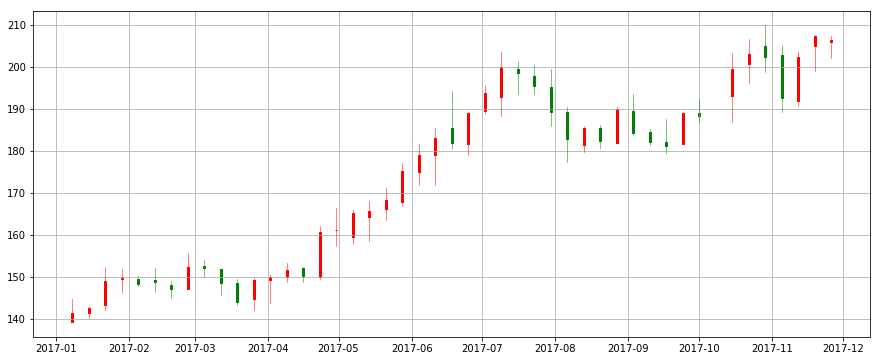

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
import mpl_finance as mpf

stock = pd.read_excel('sz50.xlsx', sheetname='600104.XSHG', index_col='datetime')
stockW = stock.resample('W').agg({'high':'max', 'low':'min', 'open':'first', 'close':'last'})

stockW['time'] = list(map(date2num, stockW.index))

Candle = stockW[['time', 'open', 'high', 'low', 'close']].values

fig, ax = plt.subplots(1,1,figsize=(15, 6))
ax.grid(True)  # 加网格
mpf.candlestick_ohlc(ax, Candle, width=0.8, colorup='r', colordown='g',alpha=1.0)

ax.xaxis_date()  # 时间转换

plt.show()

4.3 读取股票601857数据，计算股票回报率，判断样本在2017-01-01,到2017-12-31，有没有服从正态分布，并判断样本均值是否为0

In [9]:
import tushare as ts
import pandas as pd
from statsmodels.stats.stattools import jarque_bera
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
data = ts.get_k_data('601857', start='2017-01-01', end='2017-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')
data['percentage']=data['close'].pct_change()
returns = data['percentage'][1:]
_, pvalue, _, _ = jarque_bera(returns)
if pvalue > 0.05:
    print ('判断样本分布服从正态分布')
else:
    print ('判断样本分布不服从正态分布')


判断样本分布不服从正态分布


In [10]:
t_test = stats.ttest_1samp(returns, 0)
if t_test.pvalue > 0.05:
    print ('判断样本均值为0')
else:
    print ('判断样本均值不为0')

判断样本均值为0


4.4 用Pandas的递归函数计算EMA与DEMA，对比talib的EMA与DEMA
1. 根据以上的算法，利用Pandas的ewm方法计算601901.XSHG以10天为周期的EMA，再算出DEMA。
2. 用talib计算601901.XSHG以10天为周期的EMA，再算出DEMA。
3. 打印两个结果的最后5个数据

In [11]:
import talib as ta
from talib import abstract
import pandas as pd

data = pd.read_excel('sz50.xlsx', sheetname='601901.XSHG', index_col='datetime')

EMA = data.ewm(span=10).mean().close
DEMA = 2 * EMA - EMA.ewm(span=10).mean()
print(EMA.tail())
print(DEMA.tail())

datetime
2017-11-14 15:00:00    8.556962
2017-11-15 15:00:00    8.544787
2017-11-16 15:00:00    8.496644
2017-11-17 15:00:00    8.426345
2017-11-20 15:00:00    8.388828
Name: close, dtype: float64
datetime
2017-11-14 15:00:00    8.602581
2017-11-15 15:00:00    8.572151
2017-11-16 15:00:00    8.479642
2017-11-17 15:00:00    8.354917
2017-11-20 15:00:00    8.299691
Name: close, dtype: float64


In [12]:
print(abstract.EMA(data, 10).tail())
print(abstract.DEMA(data, 10).tail())

datetime
2017-11-14 15:00:00    8.556962
2017-11-15 15:00:00    8.544787
2017-11-16 15:00:00    8.496644
2017-11-17 15:00:00    8.426345
2017-11-20 15:00:00    8.388828
dtype: float64
datetime
2017-11-14 15:00:00    8.602581
2017-11-15 15:00:00    8.572151
2017-11-16 15:00:00    8.479642
2017-11-17 15:00:00    8.354917
2017-11-20 15:00:00    8.299691
dtype: float64


# 5.分析工具

数据时间：  'start_date': 20140101, 'end_date': 20180101, '

5.1 用alphalens分析沪深300成分股里float_mv因子在5日、30日、60日持有期下的因子表现。 （要求：按上证交易所上市、深证交易所上市分组，绘制ic柱状图比较不同组在不同持有期下的ic差异）-最后结果输出类似下面的表和图。

In [10]:
from jaqs.data import DataView
import warnings
warnings.filterwarnings("ignore")
dataview_folder = './Factor'
dv = DataView()
dv.load_dataview(dataview_folder)


import pandas as pd
from datetime import datetime

factor = dv.get_ts("float_mv")
factor.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , factor.index)) #索引调整为datetime日期格式
factor = factor.stack()#处理成MultiIndex格式（alphalens分析因子必须的格式）

#factor.head()

Dataview loaded successfully.


In [43]:
#dv.fields

['open',
 'vwap_adj',
 'pb',
 'pe',
 'trade_status',
 'low_adj',
 'float_mv',
 'index_member',
 'index_weight',
 'open_adj',
 'volume',
 'vwap',
 'high_adj',
 'high',
 'sw1',
 'close_adj',
 'close',
 'ps',
 'low',
 'adjust_factor',
 '_daily_adjust_factor',
 '_limit']

In [45]:
# def change_index(df):
#     df.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , df.index)) #索引调整为datetime日期格式 
#     return df

# def grouping(df):
#     for x in df.columns:
#         if x[-2:] == 'SZ':
#             df[x] = 'SZ'
#         if x[-2:] == 'SH':
#             df[x] = 'SH'
#     return df

# prices = dv.get_ts("close_adj")
# prices = change_index(prices)

# dv.add_formula("groups", "grouping(prices)",
#                is_quarterly=False,)
# #                add_data=True,
# #                register_funcs={"grouping":grouping})

# sectors = dv.get_ts("groups")
# sectors = change_index(sectors)

Variable [grouping] is not recognized (it may be wrong),try to fetch from the server...
Add field failed. No data_api available. Please specify one in parameter.


In [13]:
import numpy as np
group = pd.DataFrame(np.nan, index=dv.get_ts('close').index, columns=dv.get_ts('close').columns)
group.head()

from datetime import datetime
def change_index(df):
    df.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , df.index)) #索引调整为datetime日期格式 
    return df

for symbol in group.columns:
    group[symbol] = symbol[-2:]
group = change_index(group)
group.head()

factor = change_index(dv.get_ts('float_mv')).stack()
prices = change_index(dv.get_ts('close_adj'))

import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor,
                                                                   prices,
                                                                   groupby=group.stack(),
                                                                   quantiles=10,
                                                                   periods=(5, 30, 60))
ic_by_group = alphalens.performance.mean_information_coefficient(factor_data, by_group=True)
ic_by_group.head()

Dropped 6.4% entries from factor data (6.4% after in forward returns computation and 0.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


,5,30,60
group,,,
,NaN,NaN,NaN
SH,-0.019890,-0.011939,0.004947
SZ,-0.031756,-0.049609,-0.058176


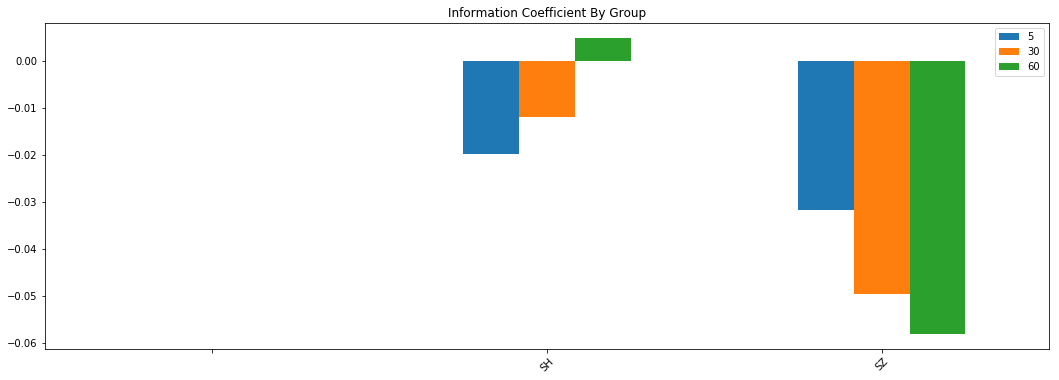

In [62]:
from matplotlib import pyplot as plt

alphalens.plotting.plot_ic_by_group(ic_by_group)
plt.show()

In [1]:
# sectors.head()

In [63]:
# import alphalens

# factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor,
#                                                                    prices,
#                                                                    groupby=sectors.stack(),
#                                                                    quantiles=5,
#                                                                    periods=(5, 30, 60))
# factor_data.head()

5.2（大致输出结果有下图）

5.2.1可视化比较CCI、Divert（习题定义）、pb的10日变化率、vwap_adj的10日变化率 这4个因子在5日、30日、60日持有期下的平均IC和IC_IR

5.2.2挑选上题中5日IC_IR最大的3个因子进行因子组合（注意需对因子进行去极值和z-score标准化处理，最终的组合因子也需要进行z-score标准化处理），并用柱状图比较各组合方法生成的因子与原因子在5日持有期下的IC和IC_IR；调用指标分析和可视化分析的方法，查看ic_weight方法合成的因子绩效，保存该合成方法下绩效最好quantile的选股结果

In [15]:
# 1.自定义因子：
import pandas as pd
import talib as ta

# 1.1 根据标准参考答案！！用append_df方法自定义因子CCI
from jaqs_fxdayu.research.signaldigger import process
Open = dv.get_ts("open_adj")
High = dv.get_ts("high_adj")
Low = dv.get_ts("low_adj")
Close = dv.get_ts("close_adj")

trade_status = dv.get_ts('trade_status')
mask_sus = trade_status == 0

# 剔除掉停牌期的数据　再计算指标
open_masked = process._mask_df(Open,mask=mask_sus)
high_masked = process._mask_df(High,mask=mask_sus)
low_masked = process._mask_df(Low,mask=mask_sus)
close_masked = process._mask_df(Close,mask=mask_sus)

from jaqs_fxdayu.data import signal_function_mod as sfm
CCI = sfm.ta(ta_method='CCI', ta_column=0, 
             Open=open_masked, 
             High=high_masked, 
             Low=low_masked, 
             Close=close_masked, Volume=None)
dv.append_df(CCI,'CCI')

# 1.2 用add_formula方法自定义因子Divert、pb的10日变化率、vwap_adj的10日变化率
dv.add_formula('Divert',
               'Correlation(close_adj,volume,20)',is_quarterly=False)#,add_data=True)
dv.add_formula('pb_pctchange10',
               'Return(pb,10)',is_quarterly=False)#,add_data=True)
dv.add_formula('vwap_pctchange10',
               'Return(vwap_adj,10)',is_quarterly=False)#,add_data=True)

print('4个因子的定义已完成')

4个因子的定义已完成


In [6]:
# 2.定义过滤条件
import numpy as np


# 2.1定义信号过滤条件-非指数成分
def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = ~(df_index_member > 0)  #?
    return mask_index_member # 返回True or False

# 2.2定义可买卖条件-未停牌、未涨跌停
def limit_up_down():
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == 0 # 判断 T or F，是否停牌  
    # 涨停
    dv.add_formula('up_limit','(close-Delay(close,1))/Delay(close,1)>0.095',
                   is_quarterly=False)#,add_data=True)
    # 跌停
    dv.add_formula('down_limit','(close-Delay(close,1))/Delay(close,1)<-0.095',
                   is_quarterly=False)#,add_data=True)
    can_enter = np.logical_and(dv.get_ts('up_limit')<1,~mask_sus)# 未涨停未停牌,逻辑_∩_返回bool
    can_exit = np.logical_and(dv.get_ts('down_limit')<1,~mask_sus)# 未跌停未停牌，返回bool
    return can_enter,can_exit # 返回bool

mask = mask_index_member() 
can_enter,can_exit = limit_up_down()

In [16]:
from jaqs_fxdayu.research.signaldigger import multi_factor
# 3.计算各因子在各时间周期的ic
ic = dict()
factors_dict = {signal:dv.get_ts(signal) for signal in ['CCI','Divert','pb_pctchange10','vwap_pctchange10']}
for period in [5,30,60]:
    ic[period] = multi_factor.get_factors_ic_df(factors_dict,
                                                price=dv.get_ts('close_adj'),
                                                high=dv.get_ts('high_adj'),
                                                low=dv.get_ts('low_adj'),
                                                n_quantiles=5,
                                                mask=mask,
                                                can_enter=can_enter,
                                                can_exit=can_exit,# 是否能出场
                                                period=period,
                                                benchmark_price=dv.data_benchmark,
                                                commission=0.0008 # 佣金
                                               )                                                

Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


In [17]:
import pandas as pd
# 建立nan的dataframe为ic均值方差、ir数据存储预备
ic_mean_table = pd.DataFrame(data=np.nan,columns=[5,30,60],index=['CCI','Divert','pb_pctchange10','vwap_pctchange10'])
ic_std_table = pd.DataFrame(data=np.nan,columns=[5,30,60],index=['CCI','Divert','pb_pctchange10','vwap_pctchange10'])
ir_table = pd.DataFrame(data=np.nan,columns=[5,30,60],index=['CCI','Divert','pb_pctchange10','vwap_pctchange10'])
# 4.计算并输出ic均值方差、ir
for signal in ['CCI','Divert','pb_pctchange10','vwap_pctchange10']:
    for period in [5,30,60]:
        ic_mean_table.loc[signal,period]=ic[period][signal].mean()
        ic_std_table.loc[signal,period]=ic[period][signal].std()
        ir_table.loc[signal,period]=ic[period][signal].mean()/ic[period][signal].std()

print('ic_mean_table:\n',ic_mean_table,'\n')
print('ic_std_table:\n',ic_std_table,'\n')
print('ir_table:\n',ir_table,'\n')        

ic_mean_table:
                         5         30        60
CCI              -0.040061 -0.028652 -0.022426
Divert           -0.031404 -0.060270 -0.055867
pb_pctchange10   -0.037514 -0.034052 -0.041460
vwap_pctchange10 -0.032767 -0.028869 -0.028492 

ic_std_table:
                         5         30        60
CCI               0.172379  0.183236  0.163978
Divert            0.134921  0.143502  0.140534
pb_pctchange10    0.189495  0.193809  0.165243
vwap_pctchange10  0.192997  0.200819  0.175494 

ir_table:
                         5         30        60
CCI              -0.232400 -0.156368 -0.136763
Divert           -0.232757 -0.419994 -0.397532
pb_pctchange10   -0.197969 -0.175698 -0.250901
vwap_pctchange10 -0.169777 -0.143756 -0.162351 



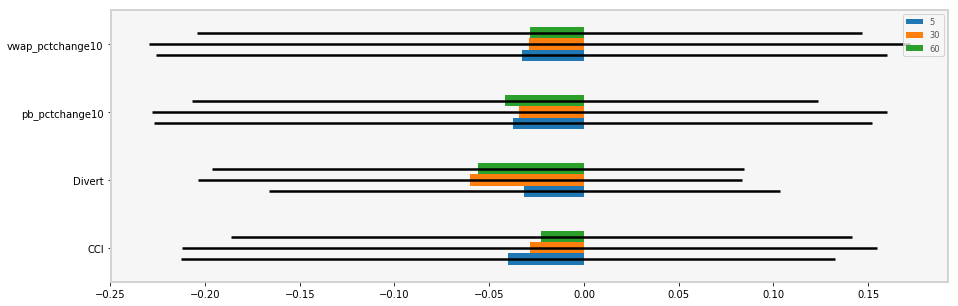

In [18]:
# 5.可视化比较
%matplotlib inline
ic_mean_table.plot(kind='barh',xerr=ic_std_table,figsize=(15,5))

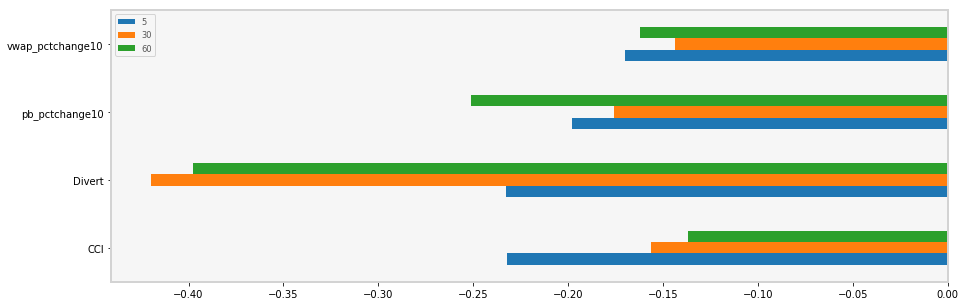

In [19]:
ir_table.plot(kind="barh",figsize=(15,5))

In [20]:
'''由以上结果可知，四个因子中5日IC_IR最大的3个因子是['CCI','Divert','pb_pctchange10']，
将这三个因子进行组合'''
from jaqs_fxdayu.research.signaldigger import process

factor_dict_III = dict()
index_member = dv.get_ts('index_member')
for name in ['CCI','Divert','pb_pctchange10']:
    signal = -1*dv.get_ts(name) #调整符号
    process.winsorize(factor_df=signal,alpha=0.05,index_member=index_member)#去极值
    signal = process.standardize(signal,index_member) # z-score标准化，保留排序信息和分布信息
    factor_dict_III[name] = signal

In [21]:
# 8.多因子组合动态加权参数配置：
props = {
    'price':dv.get_ts('close_adj'),
    'high':dv.get_ts('high_adj'),
    'low':dv.get_ts('low_adj'),
    'ret_type':'return',#可选参数还有upside_ret/downside_ret 则组合因子将以优化潜在上行、下行空间
    'benchmark_price':dv.data_benchmark,# # 为空计算的是绝对收益　不为空计算相对收益
    'period':5,# 持有期
    'mask':mask,
    'can_enter':can_enter,
    'can_exit':can_exit,
    'forward':True,
    'commission':0.0008,
    'covariance_type':'shrink',# 协方差矩阵估算方法，还可以为"simple"
    'rollback_period':120 # 滚动窗口天数，用前n期的数据计算现阶段的权重
}
# 9.分别计算在【等权重、以某个时间窗口的滚动平均ic为权重、以某个时间窗口的滚动ic_ir为权重、
#   最大化上个持有期的ic_ir为目标处理权重、最大化上个持有期的ic为目标处理权重】的组合
comb_factors = dict()
for method in ['equal_weight','ic_weight','ir_weight','max_IR','max_IC']:
    comb_factors[method] = multi_factor.combine_factors(factor_dict_III,
                                                        standardize_type='z_score',
                                                        winsorization=False,
                                                        weighted_method=method,
                                                        props=props
                                                       )
    print(method,':\n',comb_factors[method].dropna(how='all').head(),'\n')

equal_weight :
 symbol          000001.SZ  000002.SZ  000008.SZ  000009.SZ  000012.SZ  \
trade_date                                                              
20140121   NaN  -0.139362   0.281875        NaN  -0.161830  -0.687066   
20140122   NaN  -0.518597  -0.266284        NaN  -0.379162  -0.534888   
20140123   NaN  -0.383478  -0.026841        NaN  -0.805797  -0.883580   
20140124   NaN  -0.032389  -0.638706        NaN  -1.257926  -0.662164   
20140127   NaN   0.321958  -0.588997        NaN  -1.344370  -0.417370   

symbol      000027.SZ  000039.SZ  000046.SZ  000059.SZ    ...      601998.SH  \
trade_date                                                ...                  
20140121          NaN  -2.009790  -1.088146        NaN    ...       0.104882   
20140122          NaN  -0.986410  -1.261729        NaN    ...       0.296638   
20140123          NaN  -0.322715  -0.632447        NaN    ...       0.470035   
20140124          NaN  -0.268643  -0.749236        NaN    ...       0.56

Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 60%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 61%
max_IC :
 symbol          000001.SZ  000002.SZ  000008.SZ  000009.SZ  000012.SZ  \
trade_date                                                              
20140129   NaN  -0.211851   0.531957        NaN   0.802433   0.210157   
20140130   NaN  -0.114869   0.316515        NaN   1.498855   0.236778   
20140207   NaN  -0.441870   0.371544        NaN   1.498519   0.482237   
20140210   NaN  -0.131745   0.118499        NaN   2.016012   0.132366   
20140211   NaN  -0.572862   0.215673        NaN   1.942437   0.052825   

symbol      000027.SZ  000039.SZ  000046.SZ  000059.SZ    ...      601998.SH  \
trade_date                                                ...                  
20140129          NaN  -0.554293   0.143075        NaN    ...       0.125147   
20140130          NaN 

### 比较组合前和组合后的因子在5日持有期下的表现（统一到2014年9月后进行比较）

In [23]:
period = 5
ic_5  =   multi_factor.get_factors_ic_df(comb_factors,
                                          price=dv.get_ts("close_adj"),
                                          high=dv.get_ts("high_adj"), # 可为空
                                          low=dv.get_ts("low_adj"),# 可为空
                                          n_quantiles=5,# quantile分类数
                                          mask=mask,# 过滤条件
                                          can_enter=can_enter,# 是否能进场
                                          can_exit=can_exit,# 是否能出场
                                          period=period,# 持有期
                                          benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                          commission = 0.0008,
                                          )
# 合并三因子组合的ic_5与抛弃掉vwap_pctchange10并调整为正号的5日ic
ic_5 = pd.concat([ic_5,-1*ic[5].drop("vwap_pctchange10",axis=1)],axis=1)
ic_5.head()

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 51%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


,equal_weight,ic_weight,ir_weight,max_IR,max_IC,CCI,Divert,pb_pctchange10
trade_date,,,,,,,,
20140102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140103,NaN,NaN,NaN,NaN,NaN,NaN,0.024367,-0.189880
20140106,NaN,NaN,NaN,NaN,NaN,NaN,0.064487,-0.023115
20140107,NaN,NaN,NaN,NaN,NaN,NaN,0.075146,0.042528
20140108,NaN,NaN,NaN,NaN,NaN,NaN,0.076840,0.109114


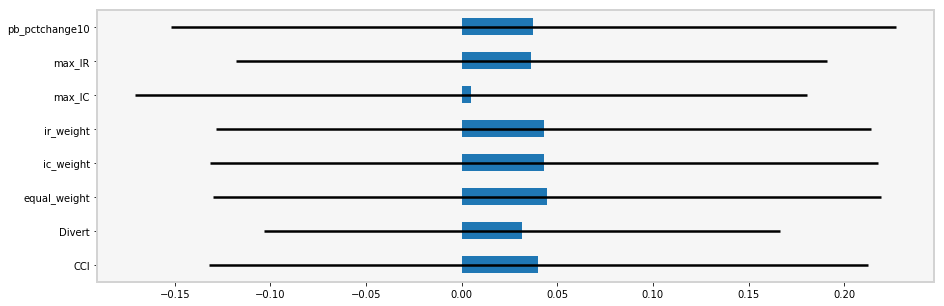

In [24]:
ic_5_mean = dict()
ic_5_std = dict()
ir_5 = dict()
for name in ic_5.columns:    
    ic_5_mean[name]=ic_5[name].mean()
    ic_5_std[name]=ic_5[name].std()
    ir_5[name] = ic_5_mean[name]/ic_5_std[name]
    
import datetime
# 转换Series索引为datetime
trade_date = pd.Series(ic_5.index)
trade_date = trade_date.apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
ic_5.index = trade_date

pd.Series(ic_5_mean).plot(kind="barh",xerr=pd.Series(ic_5_std),figsize=(15,5))

In [25]:
print(ic_5_mean["ir_weight"])
print(ic_5_mean["ic_weight"])
print(ic_5_mean["equal_weight"])

0.04292600391569956
0.043049945956449696
0.04444427660337882


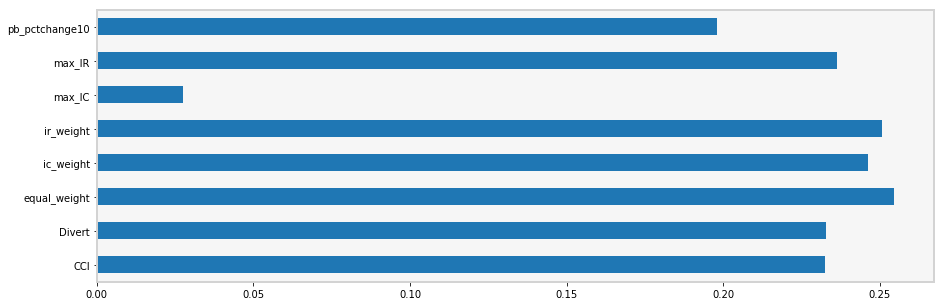

In [26]:
pd.Series(ir_5).plot(kind='barh',figsize=(15,5))

In [27]:
print(ir_5["equal_weight"])
print(ir_5["ic_weight"])
print(ir_5["ir_weight"])

0.25455449770421973
0.24611075026545978
0.25066655476299216


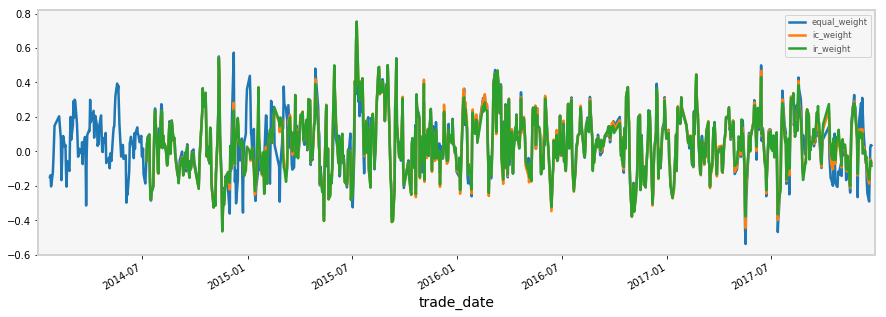

In [28]:
ic_5[["equal_weight","ic_weight","ir_weight"]].plot(kind="line",figsize=(15,5),)

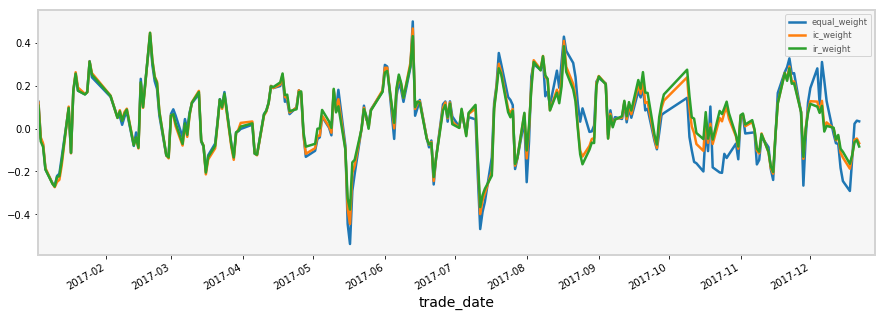

In [29]:
ic_5.loc[datetime.date(2017,1,3):,][['equal_weight','ic_weight','ir_weight']].plot(kind='line',figsize=(15,5))

Nan Data Count (should be zero) : 0;  Percentage of effective data: 52%


Value of signals of Different Quantiles Statistics
               min        max      mean       std  count    count %
quantile                                                           
1        -7.754682  -0.261460 -1.375947  0.639322  48994  20.141584
2        -1.600740   0.241220 -0.434142  0.202859  48653  20.001398
3        -0.670830   0.565974  0.043676  0.168033  48640  19.996053
4        -0.240912   1.075238  0.497214  0.174665  48653  20.001398
5         0.383181  14.031469  1.308841  0.620743  48308  19.859567
Figure saved: D:\workinhome\OFO-master\OFO-master\作业\ic_weight_5\returns_report.pdf
Information Analysis
                ic
IC Mean      0.043
IC Std.      0.175
t-stat(IC)   7.163
p-value(IC)  0.000
IC Skew      0.148
IC Kurtosis  0.235
Ann. IR      0.246
Figure saved: D:\workinhome\OFO-master\OFO-master\作业\ic_weight_5\information_report.pdf


<Figure size 432x288 with 0 Axes>

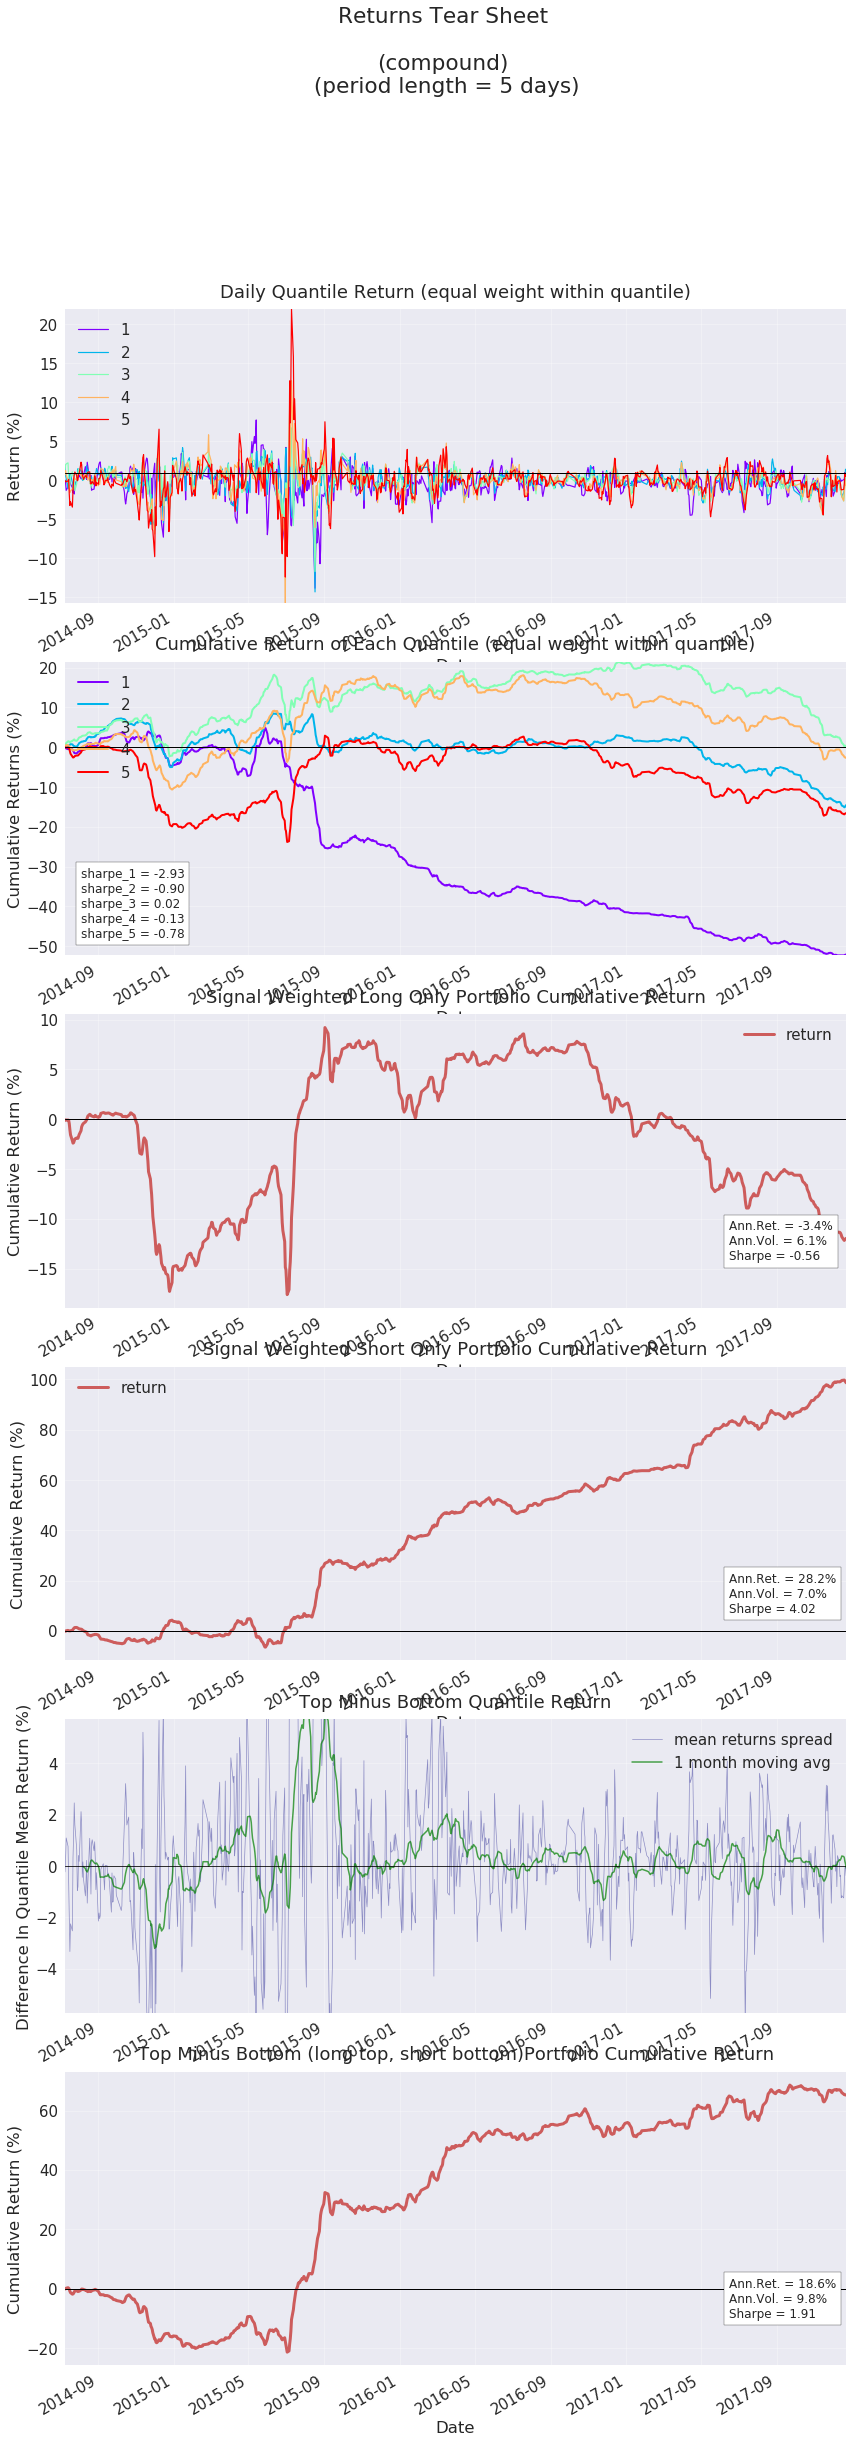

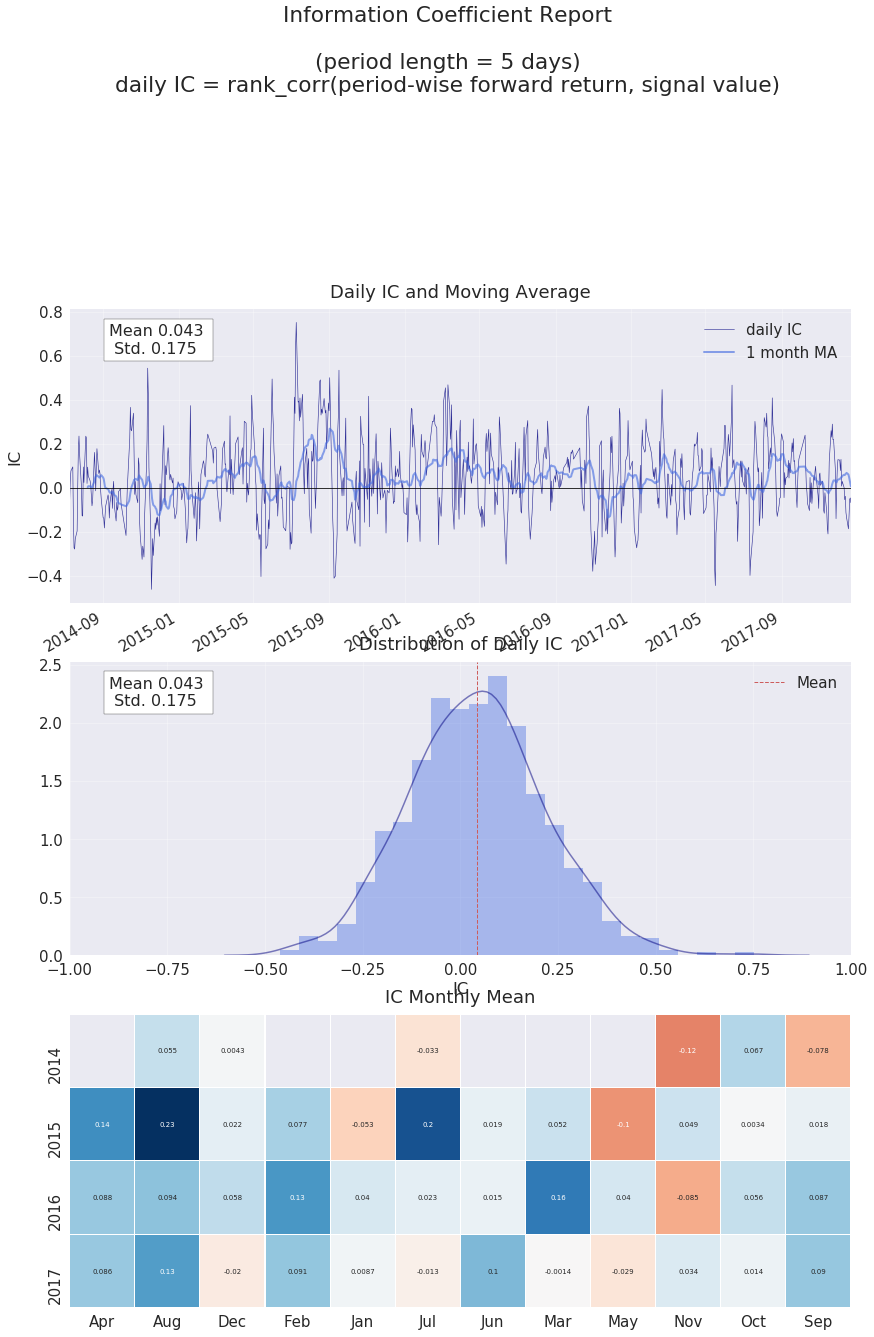

In [30]:
# 查看ic_weight(以5日为时间窗口的滚动平均ic为权重)合成因子的详情报告
import matplotlib.pyplot as plt
from jaqs_fxdayu.research.signaldigger.analysis import analysis
from jaqs_fxdayu.research import SignalDigger

obj = SignalDigger(output_folder='./ic_weight_5',output_format='pdf')
obj.process_signal_before_analysis(signal=comb_factors['ic_weight'],
                                   price=dv.get_ts("close_adj"),
                                   high=dv.get_ts("high_adj"), # 可为空
                                   low=dv.get_ts("low_adj"),# 可为空
                                   n_quantiles=5,# quantile分类数
                                   mask=mask,# 过滤条件
                                   can_enter=can_enter,# 是否能进场
                                   can_exit=can_exit,# 是否能出场
                                   period=period,# 持有期
                                   benchmark_price=dv.data_benchmark, # 基准价格
                                   commission = 0.0008,
                                  )
obj.create_full_report()
plt.show()

In [31]:
print(analysis(obj.signal_data,is_event=False,period=5))

{'ic':                 return_ic  upside_ret_ic  downside_ret_ic
IC Mean      4.304995e-02  -6.275534e-02     9.022345e-02
IC Std.      1.749210e-01   1.741343e-01     1.609368e-01
t-stat(IC)   7.162626e+00  -1.048837e+01     1.631571e+01
p-value(IC)  1.721177e-12   2.796557e-24     3.082659e-52
IC Skew      1.479618e-01   5.049351e-01    -1.903383e-01
IC Kurtosis  2.354416e-01   8.787298e-01     7.484395e-02
Ann. IR      2.461108e-01  -3.603848e-01     5.606143e-01, 'ret':              long_ret   short_ret  long_short_ret  top_quantile_ret  \
t-stat      -0.751767    6.554694        3.955380         -5.480042   
p-value      0.452400    0.000000        0.000080          0.000000   
skewness     1.331229    1.558632        1.917154          1.041500   
kurtosis    17.777376    8.727499       12.645403         10.345581   
Ann. Ret    -0.026199    0.204318        0.087132         -0.060163   
Ann. Vol     0.145704    0.130321        0.092099          0.346839   
Ann. IR     -0.179813   

In [ ]:
# 将quantile5的选股结果保存成excel
excel_data = obj.signal_data[obj.signal_data['quantile']==5]['quantile'].unstack().replace(np.nan,0).replace(5,1)
excel_data.to_excel('./ic_weight_quantile_5.xlsx')
excel_data.head()


5.3. 优化动量因子momentum：vwap_adj的n日变化率中的参数n（2<=n<=10）。优化目标是10日持有期的IC的IR。（要求：进行样本内优化，优化所用数据时段20140101~20170101，查看样本外20170101~表现，大致输出以下结果）

In [38]:
from jaqs_fxdayu.data import DataView
import warnings
warnings.filterwarnings('ignore')

# 加载数据库
dataview_folder = './Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

# 定义过滤条件
import numpy as np

def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = ~(df_index_member >0) 
    return mask_index_member

def limit_up_down():
    
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == 0
    
    dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False, add_data=True)
    
    dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False, add_data=True)
    can_enter = np.logical_and(dv.get_ts('up_limit') < 1, ~mask_sus) 
    can_exit = np.logical_and(dv.get_ts('down_limit') < 1, ~mask_sus) 
    return can_enter,can_exit

mask = mask_index_member()
can_enter,can_exit = limit_up_down()

Dataview loaded successfully.


In [39]:
from jaqs_fxdayu.research import Optimizer

price = dv.get_ts('close_adj')
high = dv.get_ts('high_adj')
low = dv.get_ts('low_adj')
# price_bench = dv.data_benchmark
# 因子参数优化
optimizer = Optimizer(dataview=dv,
                      formula='-Return(vwap_adj,LEN)',# 因子公式
                      params={'LEN':range(2,11,1)}, #调整参数n，范围[2,10]
                      name='momentum',# 因子名称
                      price=price,
                      high=high,
                      low=low,
                      benchmark_price=None, # 求绝对收益
                      period=10,# 持有期10日
                      n_quantiles=5,
                      mask=mask,# 直接调用5.2题的定义
                      can_enter=can_enter,
                      can_exit=can_exit,
                      commission=0.0008, #手续费
                      is_event=False,# 非事件
                      is_quarterly=False# 非季度
                     )

In [40]:
ret_best = optimizer.enumerate_optimizer(target_type="return_ic",
                                         target="Ann. IR",   
                                         in_sample_range=[20140101,20170101],
                                         ascending=False)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


In [41]:
from jaqs_fxdayu.research import Optimizer

price = dv.get_ts('close_adj')
high = dv.get_ts('high_adj')
low = dv.get_ts('low_adj')
price_bench = dv.data_benchmark
optimizer = Optimizer(dataview=dv,
                      formula='- Return(vwap_adj, LEN)',
                      params={"LEN":range(2,11,1)},
                      name='momentum',
                      price=price,
                      high=high,
                      low=low,
                      benchmark_price=None,#=None求绝对收益 #=price_bench求相对收益
                      period=10,
                      n_quantiles=5,
                      mask=mask,
                      can_enter=can_enter,
                      can_exit=can_exit,
                      commission=0.0008,#手续费 默认0.0008
                      is_event=False,#是否是事件(0/1因子)
                      is_quarterly=False)#是否是季度因子 默认为False

# 以持有期IC_IR为最优化目标
ic_best = optimizer.enumerate_optimizer(target_type="return_ic",#优化目标类型
                                        target = "Ann. IR",
                                        in_sample_range=[20140101,20170101],#样本内范围 默认为None,在全样本上优化
                                        ascending=False)  

Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


In [44]:
print(ic_best[0]["signal_name"])
print(ic_best[0]["ic"])
print(ic_best[0]["ret"])
print(ic_best[0]["space"])

momentum{'LEN': 10}
                return_ic  upside_ret_ic  downside_ret_ic
IC Mean      3.743164e-02  -5.225295e-02     6.117219e-02
IC Std.      1.851684e-01   1.914542e-01     1.834649e-01
t-stat(IC)   5.469247e+00  -7.384166e+00     9.021038e+00
p-value(IC)  6.209606e-08   4.189243e-13     1.619062e-18
IC Skew      2.304281e-01   3.947680e-01    -3.173880e-01
IC Kurtosis  7.155032e-01   2.366039e-01     5.240286e-01
Ann. IR      2.021492e-01  -2.729266e-01     3.334272e-01
             long_ret   short_ret  long_short_ret  top_quantile_ret  \
t-stat       5.152808   -0.829004        4.280392         18.335521   
p-value      0.000000    0.407370        0.000020          0.000000   
skewness    -0.292025    1.168624        1.420229          0.401784   
kurtosis     3.984190    3.662362        6.615581          8.336839   
Ann. Ret     0.277310   -0.054923        0.082522          0.209108   
Ann. Vol     0.295782    0.363627        0.105959          0.467113   
Ann. IR      0.9375

样本外可视化



Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1        -0.808704  0.007599 -0.076528  0.050031  13750  20.129119
2        -0.084603  0.037019 -0.021038  0.018508  13677  20.022252
3        -0.050439  0.063253  0.001917  0.018536  13652  19.985653
4        -0.039393  0.098533  0.022451  0.022301  13677  20.022252
5        -0.020183  1.000000  0.064145  0.076642  13553  19.840724
Figure saved: D:\xinge\ofo\OFO-homework&test\returns_report.pdf
Information Analysis
                ic
IC Mean     -0.025
IC Std.      0.198
t-stat(IC)  -1.889
p-value(IC)  0.060
IC Skew     -0.112
IC Kurtosis -0.640
Ann. IR     -0.123
Figure saved: D:\xinge\ofo\OFO-homework&test\information_report.pdf


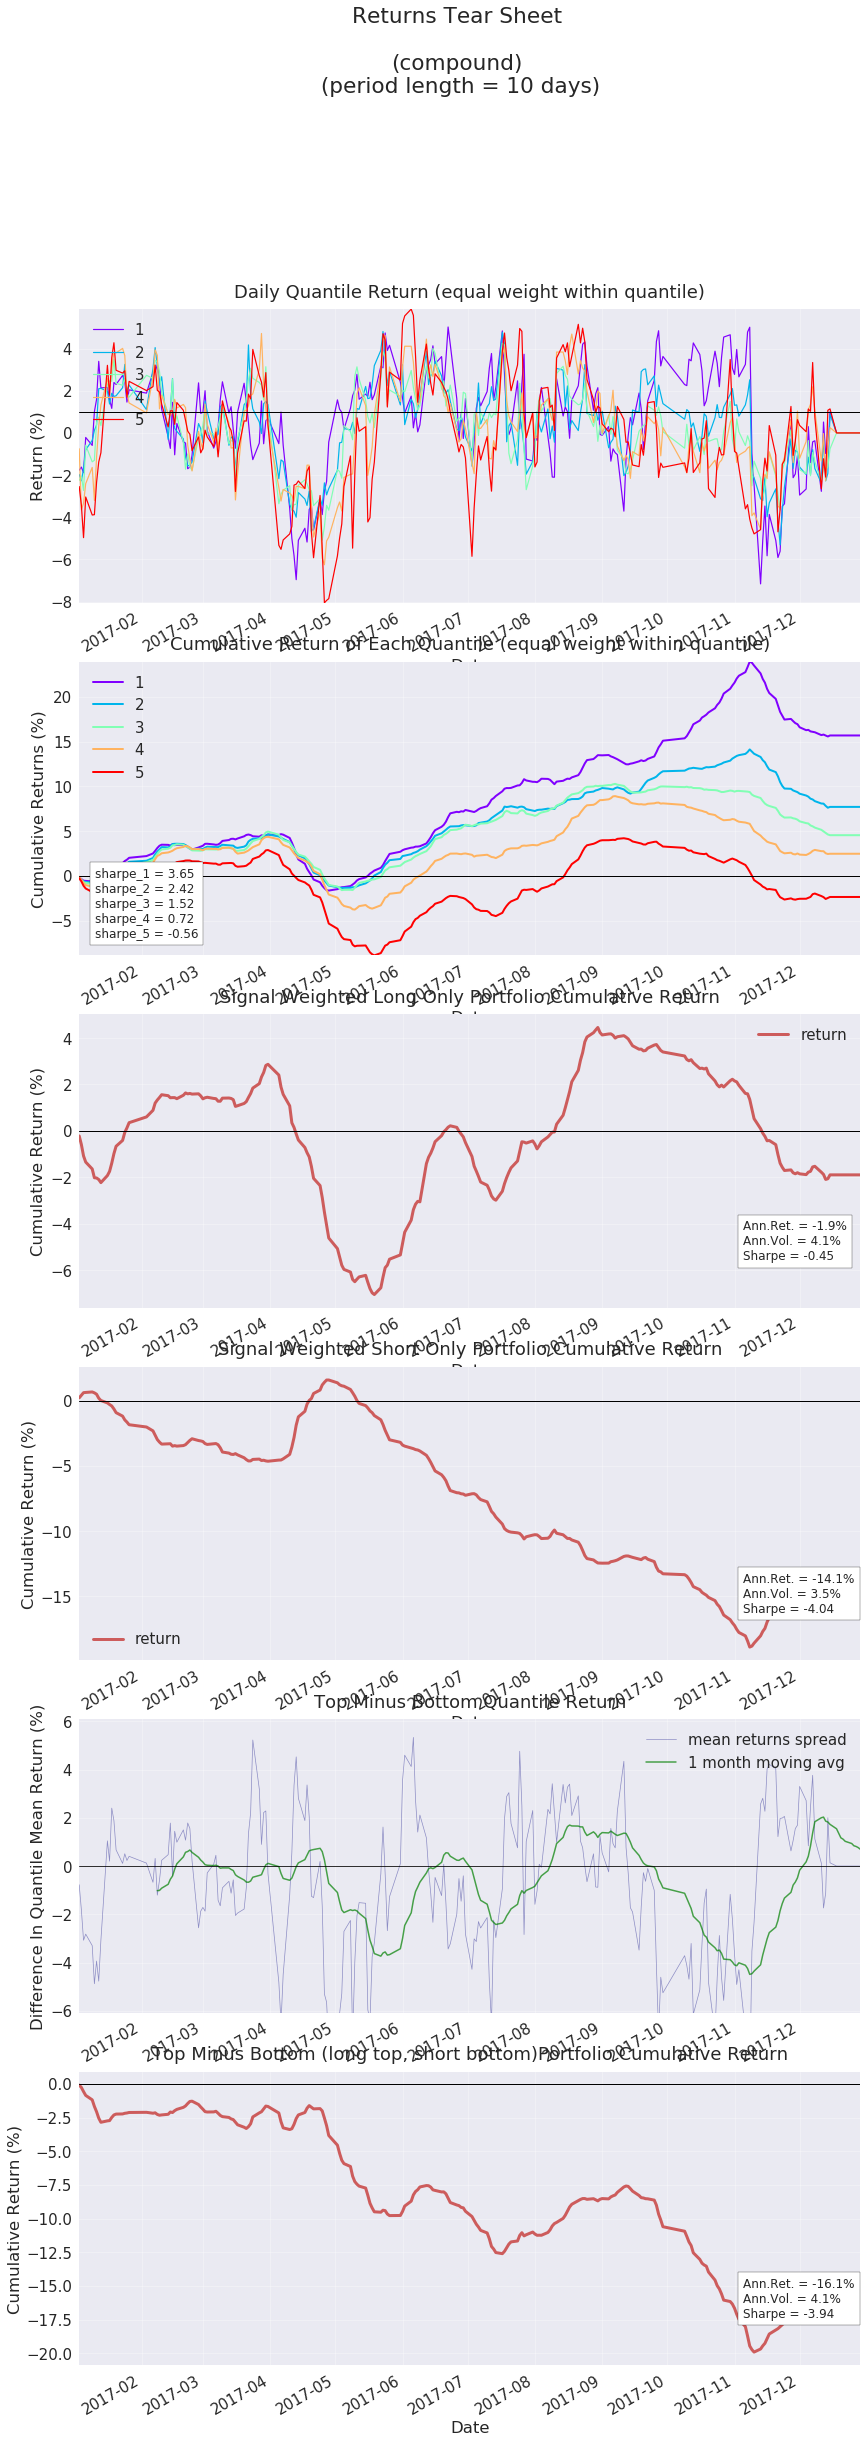

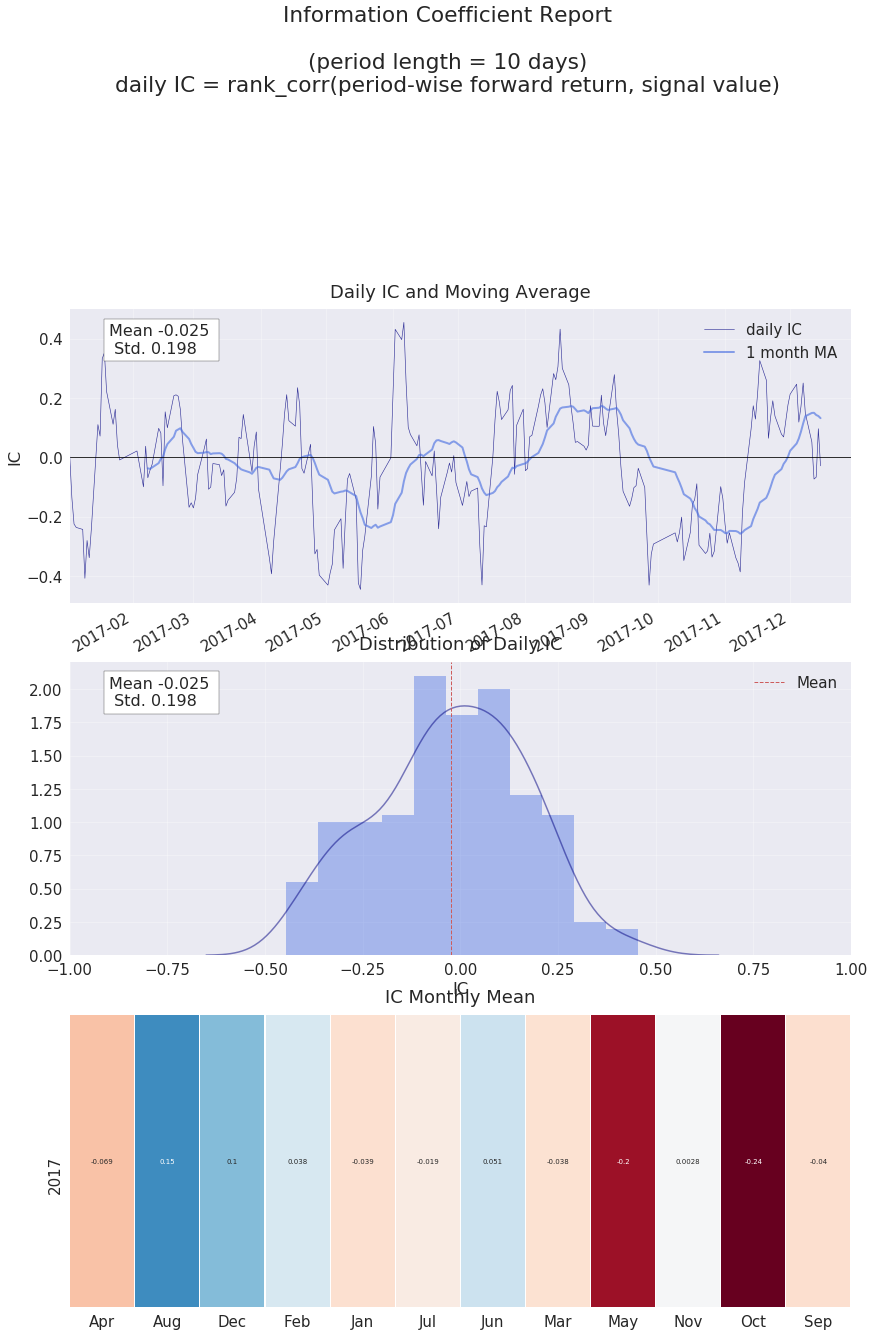

In [72]:
# from jaqs.research import SignalDigger
# from jaqs.research.signaldigger.analysis import analysis
# import matplotlib.pyplot as plt
obj = SignalDigger()
def draw_analysis(signal_data,period):  
    obj.signal_data = signal_data
    obj.period = period
    obj.create_full_report()
    plt.show()
draw_analysis(optimizer.all_signals[ic_best[0]["signal_name"]].loc[20170101:], period=10)

In [48]:
# 将结果存入excel
excel_data = optimizer.all_signals[ret_best[0]['signal_name']][optimizer.all_signals[ret_best[0]['signal_name']]['quantile']==5]['quantile'].unstack().replace(np.nan,0).replace(5,1)
excel_data.to_excel('./momentum_opt_quantile_5.xlsx')
excel_data.head()

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,000061.SZ,...,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603799.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140107,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140108,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
